<a href="https://colab.research.google.com/drive/1fgOKkJSTkn19y3PO3Xqto2nReSZJ1P8P" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Libraries

In [576]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The Pysical System: Simple Pendulum

Introduce a dataset of a simple Pendulum physical system so that it is arranged as follows:

\begin{equation}
    {\mathrm{EXPData}} = \begin{bmatrix}
        x_1 & y_1 & z_1 \\
         x_2 & y_2 & z_2 \\
         \vdots  & \vdots & \vdots  \\
         x_ n& y_n & z_n 
    \end{bmatrix}
\end{equation}

Thus the matrix ${\bf{X}} \in \mathbb{R}^{m\times n}$ where $n$ represents the number of measurements and $m$ is the number of data points taken from the system over time. 

<img src="PendulumExp.png" width="500" height="500" align="center"/>

### Import the Datasets Obtained from PhyPhox

In [578]:
#import the datasets
#orientation 1
Data1 = pd.read_excel('Data1_Pendulum.xlsx')
#orientation 2
Data2 = pd.read_excel('Data2_Pendulum.xlsx')
#orientation 3
Data3 = pd.read_excel('Data3_Pendulum.xlsx')

### Explanatory Data Analysis

In [580]:
#check if all three datasets have the same number of columns and rows.
Data1.shape , Data2.shape, Data3.shape

((500, 4), (500, 4), (500, 4))

In [582]:
#take a look at the first 5 rows of one of the datasets
Data1.head()

,Time (s),Rotation x (rad/s),Rotation y (rad/s),Rotation z (rad/s)
0,0.449161,0.067273,-0.425153,0.107458
1,0.469284,0.016513,-0.352853,0.125048
2,0.489407,-0.086190,-0.063295,0.157222
3,0.509530,-0.136991,0.186932,0.181906
4,0.529653,-0.133330,0.323694,0.150403


In [584]:
#extract the acceleration data on the three axes
#Data 1
Exp1x = Data1.iloc[:,1] #x
Exp1y = Data1.iloc[:,2] #y
Exp1z = Data1.iloc[:,3] #z
#Data 2
Exp2x = Data2.iloc[:,1] #x
Exp2y = Data2.iloc[:,2] #y
Exp2z = Data2.iloc[:,3] #z
#Data 3
Exp3x = Data3.iloc[:,1] #x
Exp3y = Data3.iloc[:,2] #y
Exp3z = Data3.iloc[:,3] #z

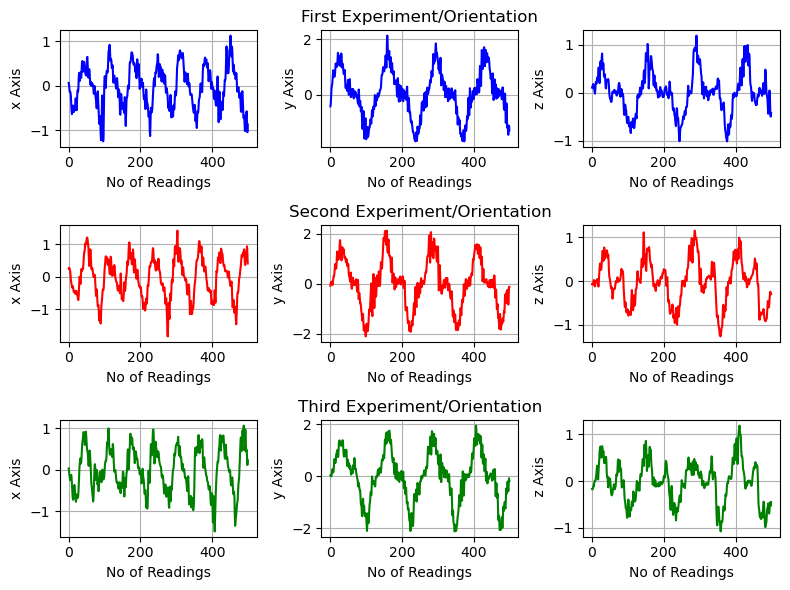

In [586]:
#visulaise the dynamics
plt.figure(figsize=(8, 6))
#Data 1
plt.subplot(3,3,1)
plt.plot(Exp1x,'b')
plt.xlabel('No of Readings')
plt.ylabel('x Axis')
plt.grid() 
plt.subplot(3,3,2)
plt.plot(Exp1y,'b')
plt.xlabel('No of Readings')
plt.ylabel('y Axis')
plt.title('First Experiment/Orientation')
plt.grid() 
plt.subplot(3,3,3)
plt.plot(Exp1z,'b')
plt.xlabel('No of Readings')
plt.ylabel('z Axis')
plt.grid() 
#Data 2
plt.subplot(3,3,4)
plt.plot(Exp2x,'r')
plt.xlabel('No of Readings')
plt.ylabel('x Axis')
plt.grid() 
plt.subplot(3,3,5)
plt.plot(Exp2y,'r')
plt.xlabel('No of Readings')
plt.ylabel('y Axis')
plt.grid() 
plt.title('Second Experiment/Orientation')
plt.subplot(3,3,6)
plt.plot(Exp2z,'r')
plt.xlabel('No of Readings')
plt.ylabel('z Axis')
plt.grid() 
#Data 3
plt.subplot(3,3,7)
plt.plot(Exp3x,'g')
plt.xlabel('No of Readings')
plt.ylabel('x Axis')
plt.grid() 
plt.subplot(3,3,8)
plt.plot(Exp3y,'g')
plt.xlabel('No of Readings')
plt.ylabel('y Axis')
plt.grid() 
plt.title('Third Experiment/Orientation')
plt.subplot(3,3,9)
plt.plot(Exp3z,'g')
plt.xlabel('No of Readings')
plt.ylabel(' z Axis')
plt.grid() 
plt.tight_layout()
plt.savefig('PendulumExperiementResults.png')
plt.show()

### Principal component Analysis (PCA)

#### STEP 1: Construct the ata matrix

\begin{equation}
    {\bf{X}}(m \times n) = \begin{bmatrix}
        -  & {\bf{x}}_a  & - \\
         -  & {\bf{y}}_a  & -  \\
         -  & {\bf{z}}_a  & -  \\
         -  & {\bf{x}}_b  & -  \\
          - & {\bf{y}}_b  & -  \\
          -  & {\bf{z}}_b  & -  \\
          -  & {\bf{x}}_c  & -  \\
            -  & {\bf{y}}_c  & - \\
            -  & {\bf{z}}_c  & - 
    \end{bmatrix}
\end{equation}

In [588]:
#put all gathered data into a single matrix
X = [[Exp1x.T],[Exp1y.T],[Exp1z.T],[Exp2x.T],[Exp2y.T],[Exp2z.T],[Exp3x.T],[Exp3y.T],[Exp3z.T]]

#from a list to nd array
X = np.array(X)

#check the size of the dataset
X.shape

(9, 1, 500)

In [590]:
#drop the middle dimension
X = X[:, 0, :]

#define the number of rows and columns of the dataset
xrow,xcol = X.shape
#check the shape of the dataset
X.shape

(9, 500)

#### STEP 2: Compute the mean

In [592]:
#take the mean of each row/measurements
mean = np.mean(X, axis=1) 
#reshape the mean so it becomes a column vector
mean = np.reshape(mean, (mean.shape[0], 1))  
#check the shape
mean.shape

(9, 1)

#### STEP 3: Subtract the mean from X

In [594]:
#subtract the mean from the dataset
B = X - mean

#check the shape of the resulting mean-centred matrix
B.shape

(9, 500)

#### STEP 4: Construct the covariance matrix.

In [596]:
#calculate the covariance matrix
Cov = np.cov(B)

#check the size of the covariance matrix
Cov.shape

(9, 9)

#### STEP 5: Compute the the eigenvalues and eigenvectors of the covariance matrix

In [598]:
#Step 5: Compute the eigenvalues and eigenvectors of the covariance matrix, C.
# Eigendecomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(Cov) 

print("Eigen vectors ", eig_vec.shape)
print("Eigen values ", eig_val.shape, "\n")

Eigen vectors  (9, 9)
Eigen values  (9,) 



#### STEP 6: Sort and select

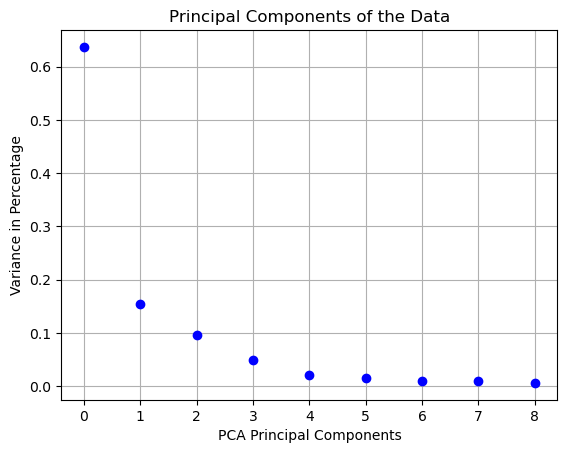

In [600]:
#Step 6: Sort and select.
#sort in an descending order
sorted_index = np.argsort(eig_val)[::-1]

#get the indices of the assorted values
sorted_eigenvalues = eig_val[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eig_vec[:,sorted_index]

# visualize the eigenvalues/principal components to decide how many values to choose/select/truncate
plt.plot(np.real(sorted_eigenvalues)/np.sum(sorted_eigenvalues),'bo') 
plt.xlabel('PCA Principal Components')
plt.ylabel("Variance in Percentage")
plt.title('Principal Components of the Data')
plt.axis('tight')
plt.grid()
plt.savefig('Eigenvalues.png', bbox_inches='tight')
plt.show()

#### STEP 7: Project the data along the principal components)

In [602]:
#calculate the PCA score/mode
Y = sorted_eigenvectors.T@B

# check the size of the PCA scores
Y.shape

(9, 500)

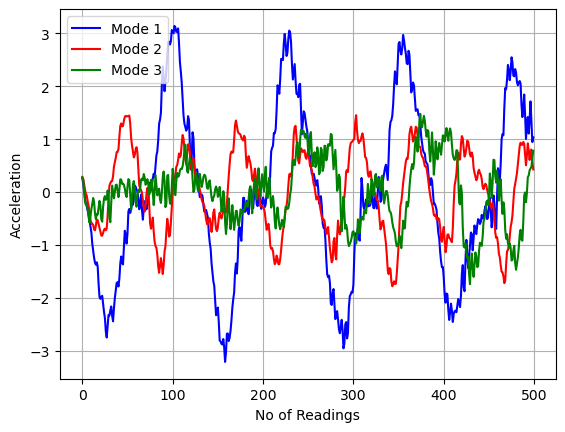

In [604]:
#visulaise the scores/Modes
plt.figure()
plt.plot(Y[0,:],'b') #first column/mode
plt.plot(Y[1,:],'r') #second column/mode
plt.plot(Y[2,:],'g') #third column/mode
plt.xlabel('No of Readings')
plt.ylabel('Acceleration')
plt.legend(['Mode 1', 'Mode 2', 'Mode 3'])
plt.grid()
plt.savefig('PCAScores.png', bbox_inches='tight')
plt.show()

### Analytical Analysis of the motion of a simple pendulum.
<img src="AnalyticalPendulumJupyter.png" width="1000" height="1000" align="center"/>